# Developing the data handler

# Load data

In [1]:
from sz_utils import data_handler
import matplotlib.pyplot as plt
import mne

In [2]:
data_path = "chb01"
data_handler.get_patient_edf(data_path)

['chb01_01.edf',
 'chb01_02.edf',
 'chb01_03.edf',
 'chb01_04.edf',
 'chb01_05.edf',
 'chb01_06.edf',
 'chb01_07.edf',
 'chb01_08.edf',
 'chb01_09.edf',
 'chb01_10.edf',
 'chb01_11.edf',
 'chb01_12.edf',
 'chb01_13.edf',
 'chb01_14.edf',
 'chb01_15.edf',
 'chb01_16.edf',
 'chb01_17.edf',
 'chb01_18.edf',
 'chb01_19.edf',
 'chb01_20.edf',
 'chb01_21.edf',
 'chb01_22.edf',
 'chb01_23.edf',
 'chb01_24.edf',
 'chb01_25.edf',
 'chb01_26.edf',
 'chb01_27.edf',
 'chb01_29.edf',
 'chb01_30.edf',
 'chb01_31.edf',
 'chb01_32.edf',
 'chb01_33.edf',
 'chb01_34.edf',
 'chb01_36.edf',
 'chb01_37.edf',
 'chb01_38.edf',
 'chb01_39.edf',
 'chb01_40.edf',
 'chb01_41.edf',
 'chb01_42.edf',
 'chb01_43.edf',
 'chb01_46.edf']

In [3]:
# just for this experiment, we will use the first edf file
edf = data_handler.get_patient_edf("chb01")[0]
edf_data = data_handler.get_edf_data("chb01", edf)

edf_data.to_data_frame().head()

Extracting EDF parameters from /mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/mnsosa/projects/SeizurePrediction/src/sz_utils/data_handler.py:51: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_data = mne.io.read_raw_edf(edf_path)


,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-145.934066,-104.517705,-42.783883,-33.015873,-170.940171,-110.769231,11.916972,-56.459096,-139.291819,...,57.240537,44.737485,74.822955,-106.080586,84.590965,43.174603,-57.240537,-264.713065,94.749695,44.737485
1,0.003906,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,0.195360,0.195360
3,0.011719,0.195360,0.586081,0.195360,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,...,1.367521,0.195360,-2.148962,0.195360,0.195360,0.195360,-0.586081,1.758242,0.195360,0.195360
4,0.015625,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.976801,0.195360,0.195360,0.195360,0.586081,-2.148962,0.195360,0.195360


Using matplotlib as 2D backend.


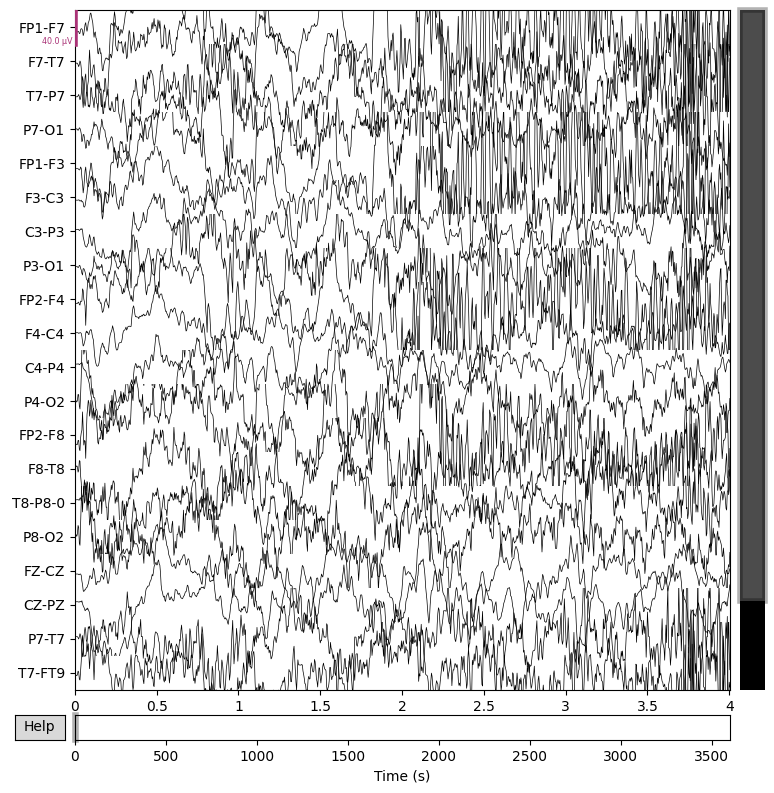

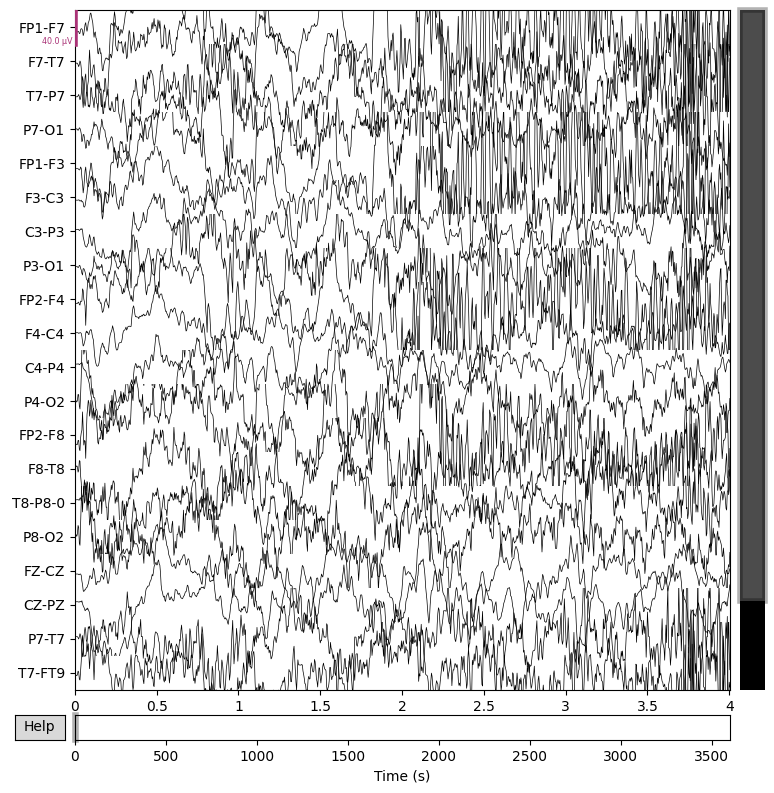

In [4]:
# plot the data
edf_data.plot(duration=4)

In [5]:
# read the summary file
summary = data_handler.get_summary("chb01")

# get all times where it says "Seizure Start Time"
seizure_start_times = [line for line in summary.splitlines() if "Seizure Start Time" in line]

# the same fot the end times
seizure_end_times = [line for line in summary.splitlines() if "Seizure End Time" in line]

# zip them together
seizure_times = list(zip(seizure_start_times, seizure_end_times))

# print them
for start, end in seizure_times:
    print(start)
    print(end)
    print()

Seizure Start Time: 2996 seconds
Seizure End Time: 3036 seconds

Seizure Start Time: 1467 seconds
Seizure End Time: 1494 seconds

Seizure Start Time: 1732 seconds
Seizure End Time: 1772 seconds

Seizure Start Time: 1015 seconds
Seizure End Time: 1066 seconds

Seizure Start Time: 1720 seconds
Seizure End Time: 1810 seconds

Seizure Start Time: 327 seconds
Seizure End Time: 420 seconds

Seizure Start Time: 1862 seconds
Seizure End Time: 1963 seconds



In [6]:
# using what we learned above, we can get the start and end times
# so we can define a function to get the seizure times

def get_seizure_times(patient: str) -> list[tuple[str, str]]:
    """Get the seizure times from the summary file"""
    summary = data_handler.get_summary(patient)
    seizure_start_times = [
        line for line in summary.splitlines() if "Seizure Start Time" in line
    ]
    # split where the ":" is and get the last element
    # strip it and get the first element (the time) and convert it to int
    seizure_start_times = [
        int(line.split(":")[-1].strip().split(" ")[0]) for line in seizure_start_times
    ]

    seizure_end_times = [
        line for line in summary.splitlines() if "Seizure End Time" in line
    ]

    # split where the ":" is and get the last element
    # strip it and get the first element (the time) and convert it to int
    seizure_end_times = [
        int(line.split(":")[-1].strip().split(" ")[0]) for line in seizure_end_times
    ]

    seizure_times = list(zip(seizure_start_times, seizure_end_times))
    return seizure_times

get_seizure_times("chb02")

[(130, 212), (2972, 3053), (3369, 3378)]

In [7]:
# read the summary file
summary = data_handler.get_summary("chb01")

# get the Number of Seizures
number_of_seizures = [line for line in summary.splitlines() if "Number of Seizures" in line]

# get the file names. it says "File Name" and then the file name in the summary file
file_names = [line for line in summary.splitlines() if "File Name" in line]

# split where the ":" is and get the last element
# the last element is the file name
file_names = [line.split(":")[-1].strip() for line in file_names]

# the same for number of seizures
number_of_seizures = [
    int(line.split(":")[-1].strip().split(" ")[0]) for line in number_of_seizures
]

# zip them together
file_names_and_seizures = dict(zip(file_names, number_of_seizures))

# print them
for file_name, number_of_seizures in file_names_and_seizures.items():
    print(file_name)
    print(number_of_seizures)
    print()

chb01_01.edf
0

chb01_02.edf
0

chb01_03.edf
1

chb01_04.edf
1

chb01_05.edf
0

chb01_06.edf
0

chb01_07.edf
0

chb01_08.edf
0

chb01_09.edf
0

chb01_10.edf
0

chb01_11.edf
0

chb01_12.edf
0

chb01_13.edf
0

chb01_14.edf
0

chb01_15.edf
1

chb01_16.edf
1

chb01_17.edf
0

chb01_18.edf
1

chb01_19.edf
0

chb01_20.edf
0

chb01_21.edf
1

chb01_22.edf
0

chb01_23.edf
0

chb01_24.edf
0

chb01_25.edf
0

chb01_26.edf
1

chb01_27.edf
0

chb01_29.edf
0

chb01_30.edf
0

chb01_31.edf
0

chb01_32.edf
0

chb01_33.edf
0

chb01_34.edf
0

chb01_36.edf
0

chb01_37.edf
0

chb01_38.edf
0

chb01_39.edf
0

chb01_40.edf
0

chb01_41.edf
0

chb01_42.edf
0

chb01_43.edf
0

chb01_46.edf
0



In [8]:
# make a function to get the number of seizures
def get_number_of_seizures(patient: str) -> dict[str, int]:
    """Get the number of seizures for each file
    
    Args:
        patient (str): The patient name

    Returns:
        dict[str, int]: A dictionary with the file name as key and the number of seizures as value
    """
    summary = data_handler.get_summary(patient)
    number_of_seizures = [
        line for line in summary.splitlines() if "Number of Seizures" in line
    ]
    file_names = [line for line in summary.splitlines() if "File Name" in line]
    file_names = [line.split(":")[-1].strip() for line in file_names]
    number_of_seizures = [
        int(line.split(":")[-1].strip().split(" ")[0]) for line in number_of_seizures
    ]
    file_names_and_seizures = dict(zip(file_names, number_of_seizures))
    return file_names_and_seizures


get_number_of_seizures("chb02")

{'chb02_01.edf': 0,
 'chb02_02.edf': 0,
 'chb02_03.edf': 0,
 'chb02_04.edf': 0,
 'chb02_05.edf': 0,
 'chb02_06.edf': 0,
 'chb02_07.edf': 0,
 'chb02_08.edf': 0,
 'chb02_09.edf': 0,
 'chb02_10.edf': 0,
 'chb02_11.edf': 0,
 'chb02_12.edf': 0,
 'chb02_13.edf': 0,
 'chb02_14.edf': 0,
 'chb02_15.edf': 0,
 'chb02_16.edf': 1,
 'chb02_16+.edf': 1,
 'chb02_17.edf': 0,
 'chb02_18.edf': 0,
 'chb02_19.edf': 1,
 'chb02_20.edf': 0,
 'chb02_21.edf': 0,
 'chb02_22.edf': 0,
 'chb02_23.edf': 0,
 'chb02_24.edf': 0,
 'chb02_25.edf': 0,
 'chb02_26.edf': 0,
 'chb02_27.edf': 0,
 'chb02_28.edf': 0,
 'chb02_29.edf': 0,
 'chb02_30.edf': 0,
 'chb02_31.edf': 0,
 'chb02_32.edf': 0,
 'chb02_33.edf': 0,
 'chb02_34.edf': 0,
 'chb02_35.edf': 0}

In [9]:
# make a dataframe with the file names and the number of seizures, start and end times
# the start and end times only makes sense for those files with number of seizures > 0
import pandas as pd

# get the file names and number of seizures
file_names_and_seizures = get_number_of_seizures("chb01")

# get the seizure times
seizure_times = get_seizure_times("chb01")

# make a dataframe
df = pd.DataFrame(
    {
        "file_name": list(file_names_and_seizures.keys()),
        "number_of_seizures": list(file_names_and_seizures.values()),
        # "seizure_times": seizure_times,
    }
)

df["start_times"] = None
df["end_times"] = None

# get the index of the files with number of seizures > 0
index_list = df[df["number_of_seizures"] > 0].index.tolist()

# set the start and end times
for index in index_list:
    # get index position in index_list
    index_position = index_list.index(index)
    df.loc[index, "start_times"] = seizure_times[index_position][0]
    df.loc[index, "end_times"] = seizure_times[index_position][1]
        
df

,file_name,number_of_seizures,start_times,end_times
0,chb01_01.edf,0,None,None
1,chb01_02.edf,0,None,None
2,chb01_03.edf,1,2996,3036
3,chb01_04.edf,1,1467,1494
4,chb01_05.edf,0,None,None
5,chb01_06.edf,0,None,None
6,chb01_07.edf,0,None,None
7,chb01_08.edf,0,None,None
8,chb01_09.edf,0,None,None
9,chb01_10.edf,0,None,None


In [10]:
# make a function from the above 
def get_seizure_data(patient: str) -> pd.DataFrame:
    """Get the seizure data for a patient
    
    Args:
        patient (str): The patient name

    Returns:
        pd.DataFrame: A dataframe with the file names, number of seizures, start and end times
    """
    file_names_and_seizures = get_number_of_seizures(patient)
    seizure_times = get_seizure_times(patient)
    df = pd.DataFrame(
        {
            "file_name": list(file_names_and_seizures.keys()),
            "number_of_seizures": list(file_names_and_seizures.values()),
        }
    )
    df["start_times"] = None
    df["end_times"] = None
    index_list = df[df["number_of_seizures"] > 0].index.tolist()
    for index in index_list:
        index_position = index_list.index(index)
        df.loc[index, "start_times"] = seizure_times[index_position][0]
        df.loc[index, "end_times"] = seizure_times[index_position][1]
    return df

get_seizure_data("chb02")

,file_name,number_of_seizures,start_times,end_times
0,chb02_01.edf,0,None,None
1,chb02_02.edf,0,None,None
2,chb02_03.edf,0,None,None
3,chb02_04.edf,0,None,None
4,chb02_05.edf,0,None,None
5,chb02_06.edf,0,None,None
6,chb02_07.edf,0,None,None
7,chb02_08.edf,0,None,None
8,chb02_09.edf,0,None,None
9,chb02_10.edf,0,None,None


## What happens if the number of seizures is > 1?

In [11]:
data_handler.get_number_of_seizures("chb13")

{'chb13_02.edf': 0,
 'chb13_03.edf': 0,
 'chb13_04.edf': 0,
 'chb13_05.edf': 0,
 'chb13_06.edf': 0,
 'chb13_07.edf': 0,
 'chb13_08.edf': 0,
 'chb13_09.edf': 0,
 'chb13_10.edf': 0,
 'chb13_11.edf': 0,
 'chb13_12.edf': 0,
 'chb13_13.edf': 0,
 'chb13_14.edf': 0,
 'chb13_15.edf': 0,
 'chb13_16.edf': 0,
 'chb13_18.edf': 0,
 'chb13_19.edf': 1,
 'chb13_21.edf': 1,
 'chb13_22.edf': 0,
 'chb13_24.edf': 0,
 'chb13_30.edf': 0,
 'chb13_36.edf': 0,
 'chb13_37.edf': 0,
 'chb13_38.edf': 0,
 'chb13_39.edf': 0,
 'chb13_40.edf': 2,
 'chb13_47.edf': 0,
 'chb13_55.edf': 2,
 'chb13_56.edf': 0,
 'chb13_58.edf': 1,
 'chb13_59.edf': 1,
 'chb13_60.edf': 1,
 'chb13_62.edf': 3}

In [12]:
data_handler.get_seizure_times("chb13")

[(2077, 2121),
 (934, 1004),
 (142, 173),
 (530, 594),
 (458, 478),
 (2436, 2454),
 (2474, 2491),
 (3339, 3401),
 (638, 660),
 (851, 916),
 (1626, 1691),
 (2664, 2721)]

In [13]:
print(data_handler.get_summary("chb13"))

Data Sampling Rate: 256 Hz
*************************

Channels in EDF Files:
**********************
Channel 1: FP1-F7
Channel 2: F7-T7
Channel 3: T7-P7
Channel 4: P7-O1
Channel 5: -
Channel 6: FP1-F3
Channel 7: F3-C3
Channel 8: C3-P3
Channel 9: P3-O1
Channel 10: -
Channel 11: FZ-CZ
Channel 12: CZ-PZ
Channel 13: -
Channel 14: FP2-F4
Channel 15: F4-C4
Channel 16: C4-P4
Channel 17: P4-O2
Channel 18: -
Channel 19: FP2-F8
Channel 20: F8-T8
Channel 21: T8-P8
Channel 22: P8-O2
Channel 23: -
Channel 24: P7-T7
Channel 25: T7-FT9
Channel 26: FT9-FT10
Channel 27: FT10-T8
Channel 28: T8-P8

File Name: chb13_02.edf
File Start Time: 16:43:14
File End Time: 17:43:14
Number of Seizures in File: 0

File Name: chb13_03.edf
File Start Time: 17:43:20
File End Time: 18:43:20
Number of Seizures in File: 0

Channels changed:
*****************
Channel 1: FP1-F7
Channel 2: F7-T7
Channel 3: T7-P7
Channel 4: P7-O1
Channel 5: -
Channel 6: FP1-F3
Channel 7: F3-C3
Channel 8: C3-P3
Channel 9: P3-O1
Channel 10: -
Cha

In [18]:
# print last 15 lines
data_handler.get_summary("chb13").splitlines()[-15:]

['File End Time: 3:20:41',
 'Number of Seizures in File: 1',
 'Seizure 1 Start Time: 638 seconds',
 'Seizure 1 End Time: 660 seconds',
 '',
 'File Name: chb13_62.edf',
 'File Start Time: 04:20:55',
 'File End Time: 5:20:55',
 'Number of Seizures in File: 3',
 'Seizure 1 Start Time: 851 seconds',
 'Seizure 1 End Time: 916 seconds',
 'Seizure 2 Start Time: 1626 seconds',
 'Seizure 2 End Time: 1691 seconds',
 'Seizure 3 Start Time: 2664 seconds',
 'Seizure 3 End Time: 2721 seconds']

In [14]:
# what happens if we have a patient with a number of seizures > 1?
# we need to correct the seizure times
# we need to make a list of lists for the start and end times
# and then zip them together

# read the summary file
summary = data_handler.get_summary("chb13")

# get the seizure start times
seizure_start_times = [
    line for line in summary.splitlines() if "Start" in line and "seconds" in line
]

# get the seizure end times
seizure_end_times = [
    line for line in summary.splitlines() if "End Time" in line and "seconds" in line
]

# split where the ":" is and get the last element
# the last element is the file name
seizure_start_times = [
    line.split(":")[-1].strip() for line in seizure_start_times
]

# split where the ":" is and get the last element
# the last element is the file name
seizure_end_times = [line.split(":")[-1].strip() for line in seizure_end_times]

# make a list of lists
seizure_start_times = [line.split(",") for line in seizure_start_times]
seizure_end_times = [line.split(",") for line in seizure_end_times]

# zip them together
seizure_times = list(zip(seizure_start_times, seizure_end_times))

# print them
for start_time, end_time in seizure_times:
    print(start_time)
    print(end_time)
    print()

['2077 seconds']
['2121 seconds']

['934 seconds']
['1004 seconds']

['142 seconds']
['173 seconds']

['530 seconds']
['594 seconds']

['458 seconds']
['478 seconds']

['2436 seconds']
['2454 seconds']

['2474 seconds']
['2491 seconds']

['3339 seconds']
['3401 seconds']

['638 seconds']
['660 seconds']

['851 seconds']
['916 seconds']

['1626 seconds']
['1691 seconds']

['2664 seconds']
['2721 seconds']



In [16]:
times = data_handler.get_seizure_times("chb13")
times

[(2077, 2121),
 (934, 1004),
 (142, 173),
 (530, 594),
 (458, 478),
 (2436, 2454),
 (2474, 2491),
 (3339, 3401),
 (638, 660),
 (851, 916),
 (1626, 1691),
 (2664, 2721)]

In [17]:
data_handler.get_seizure_data("chb13")

,file_name,number_of_seizures,start_times,end_times
0,chb13_02.edf,0,None,None
1,chb13_03.edf,0,None,None
2,chb13_04.edf,0,None,None
3,chb13_05.edf,0,None,None
4,chb13_06.edf,0,None,None
5,chb13_07.edf,0,None,None
6,chb13_08.edf,0,None,None
7,chb13_09.edf,0,None,None
8,chb13_10.edf,0,None,None
9,chb13_11.edf,0,None,None


In [21]:
seizures_13 = data_handler.get_number_of_seizures("chb13")
seizures_13

{'chb13_02.edf': 0,
 'chb13_03.edf': 0,
 'chb13_04.edf': 0,
 'chb13_05.edf': 0,
 'chb13_06.edf': 0,
 'chb13_07.edf': 0,
 'chb13_08.edf': 0,
 'chb13_09.edf': 0,
 'chb13_10.edf': 0,
 'chb13_11.edf': 0,
 'chb13_12.edf': 0,
 'chb13_13.edf': 0,
 'chb13_14.edf': 0,
 'chb13_15.edf': 0,
 'chb13_16.edf': 0,
 'chb13_18.edf': 0,
 'chb13_19.edf': 1,
 'chb13_21.edf': 1,
 'chb13_22.edf': 0,
 'chb13_24.edf': 0,
 'chb13_30.edf': 0,
 'chb13_36.edf': 0,
 'chb13_37.edf': 0,
 'chb13_38.edf': 0,
 'chb13_39.edf': 0,
 'chb13_40.edf': 2,
 'chb13_47.edf': 0,
 'chb13_55.edf': 2,
 'chb13_56.edf': 0,
 'chb13_58.edf': 1,
 'chb13_59.edf': 1,
 'chb13_60.edf': 1,
 'chb13_62.edf': 3}

In [26]:
times_13 = get_seizure_times("chb13")
times_13

[(2077, 2121),
 (934, 1004),
 (142, 173),
 (530, 594),
 (458, 478),
 (2436, 2454),
 (2474, 2491),
 (3339, 3401),
 (638, 660),
 (851, 916),
 (1626, 1691),
 (2664, 2721)]

In [90]:
# if a patient has more than one seizure, we need to make a list of lists
# and then zip them together

# get the number of seizures
number_of_seizures = data_handler.get_number_of_seizures("chb13")

# convert the dictionary to a list of values
number_of_seizures = list(number_of_seizures.values())

# get the seizure times
seizure_times = get_seizure_times("chb13")

# all indexes where the number of seizures > 0
indexes_gt_0 = [i for i, x in enumerate(number_of_seizures) if x > 0]

# number of seizures for indexes_gt_0
number_of_seizures_gt_0 = [number_of_seizures[i] for i in indexes_gt_0]

# indexes of times
indexes_times = [i for i, _ in enumerate(seizure_times)]

# print(indexes_times)
# print(number_of_seizures_gt_0)

# group the indexes_gt_0 by the number of seizures
groups = []
i = 0
for i_gt_0 in number_of_seizures_gt_0:
    # print("i:", i, "- n_sz:", i_gt_0)
    groups.append(indexes_times[i : i + i_gt_0])
    # print(groups)
    i += i_gt_0


print(groups)

# theese are the indexes of seizure times to make a list of lists
# and then zip them together
# use the groups list to get the seizure times in the correct order
seizure_times_group = []
for group in groups:
    seizure_times_group.append([seizure_times[i] for i in group])
    
seizure_times_group

[[0], [1], [2, 3], [4, 5], [6], [7], [8], [9, 10, 11]]


[[(2077, 2121)],
 [(934, 1004)],
 [(142, 173), (530, 594)],
 [(458, 478), (2436, 2454)],
 [(2474, 2491)],
 [(3339, 3401)],
 [(638, 660)],
 [(851, 916), (1626, 1691), (2664, 2721)]]

In [92]:
# make a function from the above
def get_seizure_times(patient: str) -> list[list[tuple[str, str]]]:
    """Get the seizure times for a patient
    
    Args:
        patient (str): The patient name

    Returns:
        list[list[tuple[str, str]]]: A list of lists of tuples with the start and end times
    """
    number_of_seizures = data_handler.get_number_of_seizures(patient)
    number_of_seizures = list(number_of_seizures.values())
    seizure_times = data_handler.get_seizure_times(patient)
    indexes_gt_0 = [i for i, x in enumerate(number_of_seizures) if x > 0]
    number_of_seizures_gt_0 = [number_of_seizures[i] for i in indexes_gt_0]
    indexes_times = [i for i, _ in enumerate(seizure_times)]
    groups = []
    i = 0
    for i_gt_0 in number_of_seizures_gt_0:
        groups.append(indexes_times[i : i + i_gt_0])
        i += i_gt_0
    seizure_times_group = []
    for group in groups:
        seizure_times_group.append([seizure_times[i] for i in group])
    return seizure_times_group

get_seizure_times("chb13")

[[(2077, 2121)],
 [(934, 1004)],
 [(142, 173), (530, 594)],
 [(458, 478), (2436, 2454)],
 [(2474, 2491)],
 [(3339, 3401)],
 [(638, 660)],
 [(851, 916), (1626, 1691), (2664, 2721)]]

In [106]:
# reload the libs
import importlib
importlib.reload(data_handler)

<module 'sz_utils.data_handler' from '/home/mnsosa/projects/SeizurePrediction/src/sz_utils/data_handler.py'>

In [107]:
data_handler.get_seizure_times("chb13")

[[(2077, 2121)],
 [(934, 1004)],
 [(142, 173), (530, 594)],
 [(458, 478), (2436, 2454)],
 [(2474, 2491)],
 [(3339, 3401)],
 [(638, 660)],
 [(851, 916), (1626, 1691), (2664, 2721)]]

In [108]:
data_handler.get_seizure_data("chb13")

,file_name,number_of_seizures,start_end_times
0,chb13_02.edf,0,NaN
1,chb13_03.edf,0,NaN
2,chb13_04.edf,0,NaN
3,chb13_05.edf,0,NaN
4,chb13_06.edf,0,NaN
5,chb13_07.edf,0,NaN
6,chb13_08.edf,0,NaN
7,chb13_09.edf,0,NaN
8,chb13_10.edf,0,NaN
9,chb13_11.edf,0,NaN
